In [13]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import matplotlib as mp
from open_abf import plot_swps, get_sweeps, swp_window
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import leastsq
import functions as func
%matplotlib widget

In [2]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/"
folders = glob(pathToData+"*")
folders

['/home/alan/Documents/LAB/CSHL/Data/Cav',
 '/home/alan/Documents/LAB/CSHL/Data/Kv',
 '/home/alan/Documents/LAB/CSHL/Data/Nav']

In [3]:
files = glob(folders[0]+"/*.abf")
files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0017.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0014.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0015.abf']

### Ramp test

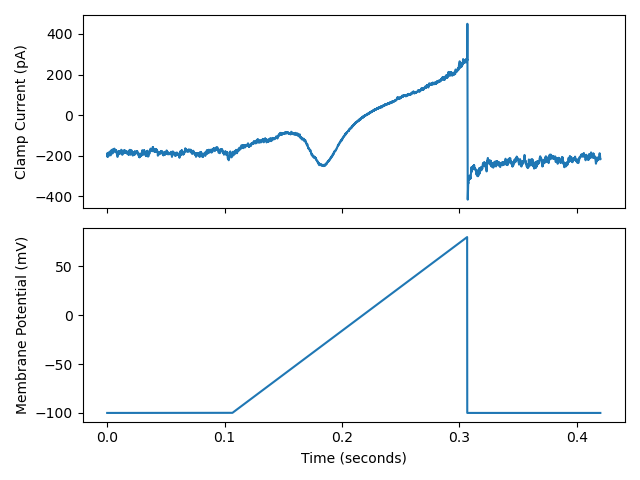

In [4]:
f = files[3]
plot_swps(f)

### Activation

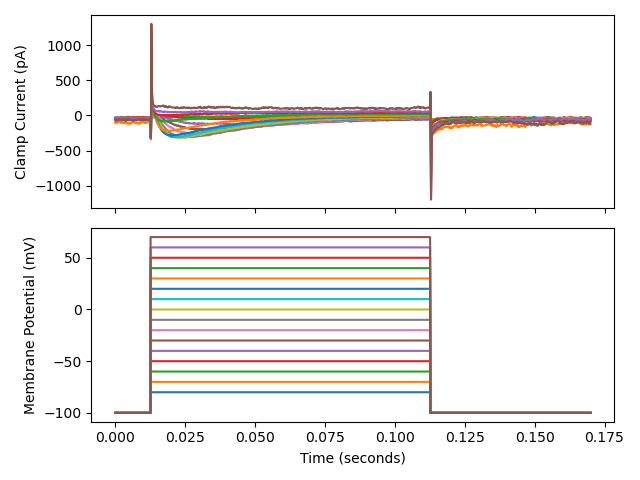

In [5]:
f = files[2]
plot_swps(f)

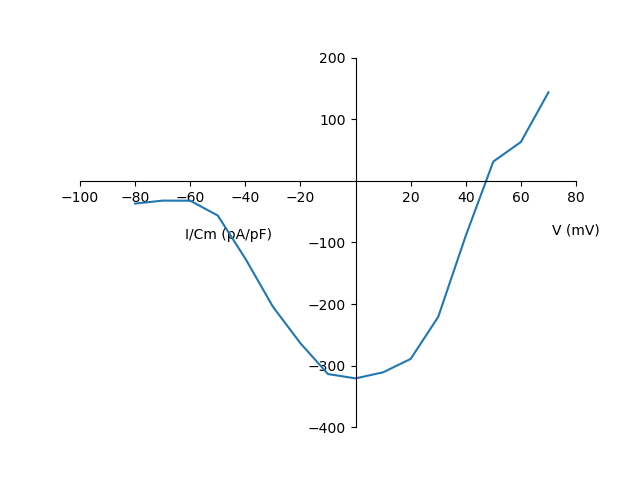

In [23]:
## Extract the sweeps
swps, swp_time, sr = get_sweeps(f)
## Enter the membrane capacitance you have noted
capacitance = 10 # pF
## The mean on your voltage step:
v_start = 0.014
v_end = 0.02
voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
## The mean on your voltage step:
v_start = 0.01
v_end = 0.012
current_baseline = np.mean(swp_window(swps,v_start,v_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.015
i_end = 0.04
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
current_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window])
## normalise over baseline
current_response -= current_baseline
## Create a figure plot with this line:
fig,ax = plt.subplots()
## the ax.plot(x,y,'line, dot,...') will plot your data to the figure
# image_path = '/home/alan/Documents/LAB/CSHL/Airplane.png'  # Path to your airplane image file
# airplane_image = plt.imread(image_path)
# ##
# # Create a custom marker using the airplane image
# def airplane_marker(ax, xdata, ydata, image):
#     for x, y in zip(xdata, ydata):
#         ab = AnnotationBbox(OffsetImage(image, zoom=0.25), (x, y), frameon=False)
#         ax.add_artist(ab)
    
ax.plot(voltage_step,current_response,linestyle='-')
# airplane_marker(ax,voltage_step,current_response, airplane_image)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel('V (mV)')
ax.set_ylabel('I/Cm (pA/pF)', rotation=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_label_coords(1, 0.55) 
ax.yaxis.set_label_coords(0.3, 0.5)  # Move the y label to the center left
# Customize ticks to remove the 0 ticks and labels
xticks = [tick for tick in ax.get_xticks() if tick != 0]
yticks = [tick for tick in ax.get_yticks() if tick != 0]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.show()

### Inactivation